**Question 1**

Convert 1D Array Into 2D Array

You are given a **0-indexed** 1-dimensional (1D) integer array original, and two integers, m and n. You are tasked with creating a 2-dimensional (2D) array with  m rows and n columns using **all** the elements from original.

The elements from indices 0 to n - 1 (**inclusive**) of original should form the first row of the constructed 2D array, the elements from indices n to 2 * n - 1 (**inclusive**) should form the second row of the constructed 2D array, and so on.

Return *an* m x n *2D array constructed according to the above procedure, or an empty 2D array if it is impossible*.

**Example 1:**

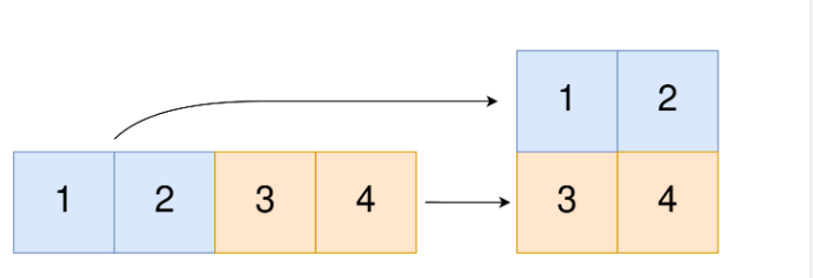

**Input:** original = [1,2,3,4], m = 2, n = 2

**Output:** [[1,2],[3,4]]

**Explanation:** The constructed 2D array should contain 2 rows and 2 columns.

The first group of n=2 elements in original, [1,2], becomes the first row in the constructed 2D array.

The second group of n=2 elements in original, [3,4], becomes the second row in the constructed 2D array.

In [1]:
def construct2DArray(original, m, n) :
        if len(original)!=m*n:
            return []
        matrix=[]
        for i in range(0,len(original),n):
            matrix.append(original[i:i+n])
        return matrix


# Driver code 
original = [1,2,3,4]
m = 2
n = 2

construct2DArray(original,m, n)

[[1, 2], [3, 4]]

**Question 2**

You have n coins and you want to build a staircase with these coins. The staircase consists of k rows where the ith row has exactly i coins. The last row of the staircase **may be** incomplete.

Given the integer n, return *the number of **complete rows** of the staircase you will build*.

**Example 1:**

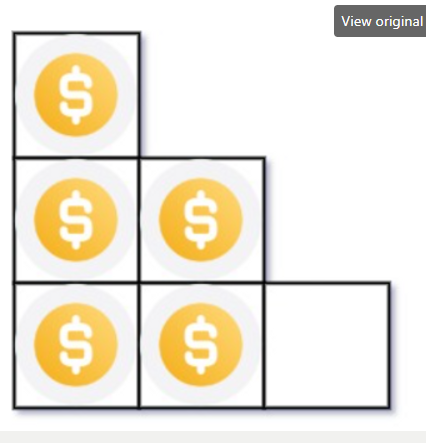

**Input:** n = 5

**Output:** 2

**Explanation:** Because the 3rd row is incomplete, we return 2.

In [2]:
def arrangeCoins(n: int) -> int:
    left, right = 0, n
    while left <= right:
        k = (right + left) // 2
        curr = k * (k + 1) // 2
        if curr == n:
            return k
        if n < curr:
            right = k - 1
        else:
            left = k + 1
    return right

arrangeCoins(1804289383)

60070

**Question 3**
Given an integer array nums sorted in **non-decreasing** order, return *an array of **the squares of each number** sorted in non-decreasing order*.

**Example 1:**

**Input:** nums = [-4,-1,0,3,10]

**Output:** [0,1,9,16,100]

**Explanation:** After squaring, the array becomes [16,1,0,9,100].

After sorting, it becomes [0,1,9,16,100].

In [3]:
def sortedSquares(nums):
    n = len(nums)
    left = 0
    right = n-1
    res = [0 for x in nums]
    
    for i in range(n-1, -1,-1):
        # print(i)
        if abs(nums[left]) > abs(nums[right]):
            res[i] = nums[left] * nums[left]
            left += 1
        else:
            res[i] = nums[right] * nums[right]
            right -= 1

    return res
    
        


# nums = [-4,-1,0,3,10]
nums = [-12,-11,-10,-9,-8,-7]
sortedSquares(nums)

# tc = sc = O(n)

[49, 64, 81, 100, 121, 144]

**Question 4**
Given two **0-indexed** integer arrays nums1 and nums2, return *a list* answer *of size* 2 *where:*

- answer[0] *is a list of all **distinct** integers in* nums1 *which are **not** present in* nums2*.*
- answer[1] *is a list of all **distinct** integers in* nums2 *which are **not** present in* nums1.

**Note** that the integers in the lists may be returned in **any** order.

**Example 1:**

**Input:** nums1 = [1,2,3], nums2 = [2,4,6]

**Output:** [[1,3],[4,6]]

**Explanation:**

For nums1, nums1[1] = 2 is present at index 0 of nums2, whereas nums1[0] = 1 and nums1[2] = 3 are not present in nums2. Therefore, answer[0] = [1,3].

For nums2, nums2[0] = 2 is present at index 1 of nums1, whereas nums2[1] = 4 and nums2[2] = 6 are not present in nums2. Therefore, answer[1] = [4,6].

In [4]:
def getElementInFirst(n1,n2):
    s = set(n2)
    res = []
    for i in n1:
        if i not in s and i not in res:
            res.append(i)
    
    return res

def findDifference(nums1, nums2):
    # res = []
    # res.append(getElementInFirst(nums1, nums2))
    # res.append(getElementInFirst(nums2,nums1))
    return [getElementInFirst(nums1, nums2), getElementInFirst(nums2,nums1)]

nums1 = [1,2,3]
nums2 = [2,4,6]

# nums1 = [1,2,3,3]
# nums2 = [1,1,2,2]

findDifference(nums1,nums2)

[[1, 3], [4, 6]]

**Question 5**
Given two integer arrays arr1 and arr2, and the integer d, *return the distance value between the two arrays*.

The distance value is defined as the number of elements arr1[i] such that there is not any element arr2[j] where |arr1[i]-arr2[j]| <= d.

**Example 1:**

**Input:** arr1 = [4,5,8], arr2 = [10,9,1,8], d = 2

**Output:** 2

**Explanation:**

For arr1[0]=4 we have:

|4-10|=6 > d=2

|4-9|=5 > d=2

|4-1|=3 > d=2

|4-8|=4 > d=2

For arr1[1]=5 we have:

|5-10|=5 > d=2

|5-9|=4 > d=2

|5-1|=4 > d=2

|5-8|=3 > d=2

For arr1[2]=8 we have:

**|8-10|=2 <= d=2**

**|8-9|=1 <= d=2**

|8-1|=7 > d=2

|8-8|=0 <= d=2

In [5]:
def findTheDistanceValue(arr1, arr2, d):
        res, buckets = 0, dict() # (minVa, maxVal)
        
        def getKey(val):
            return val // d
        
        def addVal(val):
            key = getKey(val)
            #save only min and max value in bucket, others values not
            if key in buckets:
                if buckets[key][0] > val: buckets[key][0] = val
                elif buckets[key][1] < val: buckets[key][1] = val
            else:
                buckets[key] = [val, val]
        
        #initialize buckets     
        for val in arr2: addVal(val)

        for val in arr1:
            key = getKey(val)
            if key in buckets: continue #in one bucket all values x < d
            #check sibling buckets
            if key - 1 in buckets and val - buckets[key-1][1] <= d: continue #maxVal from the left side is nearest
            if key + 1 in buckets and buckets[key+1][0] - val <= d: continue #minVal from the right side is nearest
            res += 1

        return res


# Drivercode

arr1 = [4,5,8]
arr2 = [10,9,1,8]
d = 2

findTheDistanceValue(arr1,arr2,d)

# tc = sc = O(n)

2

**Question 6**

Given an integer array nums of length n where all the integers of nums are in the range [1, n] and each integer appears **once** or **twice**, return *an array of all the integers that appears **twice***.

You must write an algorithm that runs in O(n) time and uses only constant extra space.

**Example 1:**

**Input:** nums = [4,3,2,7,8,2,3,1]

**Output:**

[2,3]

In [6]:
def findDuplicates(nums) :
    ans = []
    for i in range(len(nums)):
        if nums[abs(nums[i])-1]>0:
            nums[abs(nums[i])-1] = -nums[abs(nums[i])-1]
        else:
            ans.append(abs(nums[i]))
    return ans


# Drivercode

nums = [4,3,2,7,8,2,3,1]
findDuplicates(nums)


# tc = O(n)
# sc = O(1)

[2, 3]

**Question 7**

Suppose an array of length n sorted in ascending order is **rotated** between 1 and n times. For example, the array nums = [0,1,2,4,5,6,7] might become:

- [4,5,6,7,0,1,2] if it was rotated 4 times.
- [0,1,2,4,5,6,7] if it was rotated 7 times.

Notice that **rotating** an array [a[0], a[1], a[2], ..., a[n-1]] 1 time results in the array [a[n-1], a[0], a[1], a[2], ..., a[n-2]].

Given the sorted rotated array nums of **unique** elements, return *the minimum element of this array*.

You must write an algorithm that runs in O(log n) time.

**Example 1:**

**Input:** nums = [3,4,5,1,2]

**Output:** 1

**Explanation:**

The original array was [1,2,3,4,5] rotated 3 times.

In [7]:
def find_min(arr, low, n):
    if arr[low] <= arr[n]:
        # If the array is not rotated
        return arr[i]

    #binary search
    while low <= n:
        mid = low + (n - low)//2

        # Check if mid is the minimum element
        if arr[mid] < arr[mid -1]:
            return arr[mid]
        
        # If the right half is sorted, the minimum element must be in the left half
        if arr[mid] > arr[n]:
            low = mid + 1

        # If the left half is sorted, the minimum element must be in the right half
        else:
            n = mid - 1
 
        
    return None
        



# Drivercode

arr = [5, 6, 1, 2, 3, 4]
n = len(arr) - 1
find_min(arr, 0, n)


1

**Question 8**

An integer array original is transformed into a **doubled** array changed by appending **twice the value** of every element in original, and then randomly **shuffling** the resulting array.

Given an array changed, return original *if* changed *is a **doubled** array. If* changed *is not a **doubled** array, return an empty array. The elements in* original *may be returned in **any** order*.

**Example 1:**

**Input:** changed = [1,3,4,2,6,8]

**Output:** [1,3,4]

**Explanation:** One possible original array could be [1,3,4]:

- Twice the value of 1 is 1 * 2 = 2.
- Twice the value of 3 is 3 * 2 = 6.
- Twice the value of 4 is 4 * 2 = 8.

Other original arrays could be [4,3,1] or [3,1,4].

In [8]:
from collections import Counter

def findOriginalArray(changed):
    if len(changed) % 2 == 1:
        return []
    data = Counter(changed)
    result = []
    for k in sorted(data):
        if data[k] < 0:
            return []
        value = k * 2
        while data[k] > 0:
            if data[value] == 0:
                return []
            result.append(k)
            data[k] -= 1
            data[value] -= 1
    return result

# Drivercode
changed = [1,3,4,2,6,8]
findOriginalArray(changed)

[1, 3, 4]